<a href="https://colab.research.google.com/github/nnaemekaukpa/Leveraging-Deep-Learning-Architecture-for-Accurate-and-Efficient-Bone-Cancer-Detection-/blob/main/AlexNet_%2B_without_canny%2Bexp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Importing the necessary libraries
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import image as mpimg
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dataset = '/content/drive/MyDrive/bone cancer detection.v2i.folder/train'
valid_dataset = '/content/drive/MyDrive/bone cancer detection.v2i.folder/valid'
test_dataset = '/content/drive/MyDrive/bone cancer detection.v2i.folder/test'

In [ ]:
## function to list files and folder in the directory
def list_contents(directory):
  if os.path.exists(directory):
    print(f'contents of {directory}:')
    print(os.listdir(directory))
  else:
    print(f'{directory} does not exist')



In [ ]:
list_contents(train_dataset)
list_contents(valid_dataset)
list_contents(test_dataset)

contents of /content/drive/MyDrive/bone cancer detection.v2i.folder/train:
['normal', 'cancer']
contents of /content/drive/MyDrive/bone cancer detection.v2i.folder/valid:
['cancer', 'normal']
contents of /content/drive/MyDrive/bone cancer detection.v2i.folder/test:
['cancer', 'normal']


In [ ]:
def count_files(directory):
  if os.path.exists(directory):
    classes=[i for i in os.listdir(directory) if os.path.isdir(os.path.join(directory, i))]
    total_files=sum([len(files) for _,_,files in os.walk(directory)])
    print(f'found {total_files} images belonging to {len(classes)} classes.')
  else:
    print(f'{directory} does not exist')

In [ ]:
count_files(train_dataset)
count_files(valid_dataset)
count_files(test_dataset)

found 21141 images belonging to 2 classes.
found 881 images belonging to 2 classes.
found 881 images belonging to 2 classes.


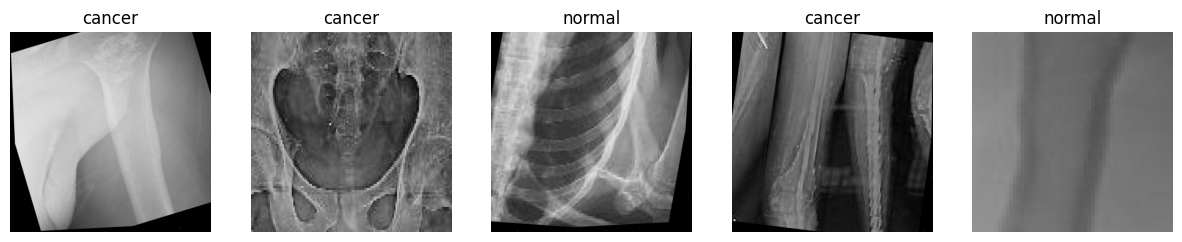

In [ ]:


# Get classes (subfolders) in Train dataset
classes = [i for i in os.listdir(train_dataset) if os.path.isdir(os.path.join(train_dataset, i))]

# Select 5 random images from random classes
images = []
labels = []
for _ in range(5):
    class_name = random.choice(classes)
    class_path = os.path.join(train_dataset, class_name)
    image_file = random.choice(os.listdir(class_path))
    images.append(os.path.join(class_path, image_file))
    labels.append(class_name)

# Display images
plt.figure(figsize=(15, 20))
for i, img_path in enumerate(images):
    img = mpimg.imread(img_path)
    plt.subplot(1,5, i + 1)
    plt.imshow(img)
    plt.title(labels[i])
    plt.axis("off")
plt.show()


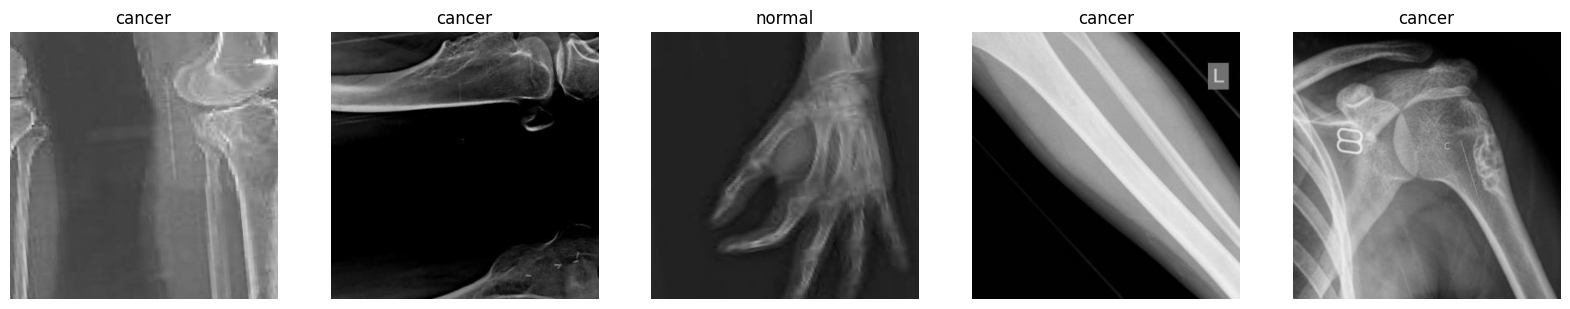

In [ ]:


# Get classes (subfolders) in test dataset
classes = [d for d in os.listdir(test_dataset) if os.path.isdir(os.path.join(test_dataset, d))]

# Select 5 random images from random classes
images = []
labels = []
for _ in range(5):
    class_name = random.choice(classes)
    class_path = os.path.join(test_dataset, class_name)
    image_file = random.choice(os.listdir(class_path))
    images.append(os.path.join(class_path, image_file))
    labels.append(class_name)

# Display images
plt.figure(figsize=(20, 20))
for i, img_path in enumerate(images):
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(labels[i])
    plt.axis("off")

plt.show()


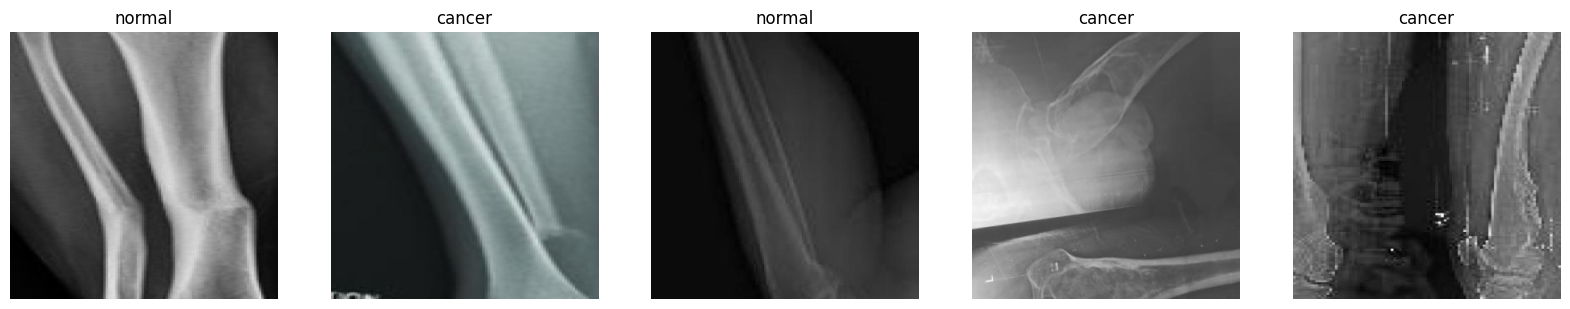

In [ ]:


# Get classes (subfolders) in valid dataset
classes = [d for d in os.listdir(valid_dataset) if os.path.isdir(os.path.join(valid_dataset, d))]

# Select 5 random images from random classes
images = []
labels = []
for _ in range(5):
    class_name = random.choice(classes)
    class_path = os.path.join(valid_dataset, class_name)
    image_file = random.choice(os.listdir(class_path))
    images.append(os.path.join(class_path, image_file))
    labels.append(class_name)

# Display images
plt.figure(figsize=(20, 20))
for i, img_path in enumerate(images):
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(labels[i])
    plt.axis("off")

plt.show()


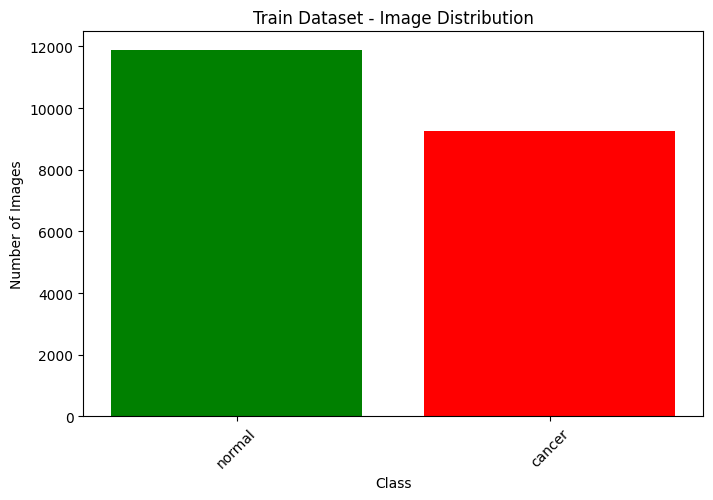

In [ ]:
# Count images in each class (train)
class_counts = {}
for class_name in os.listdir(train_dataset):
    class_path = os.path.join(train_dataset, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(class_counts.keys(), class_counts.values(), color=['green', 'red','blue'])
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Train Dataset - Image Distribution")
plt.xticks(rotation=45)
plt.show()



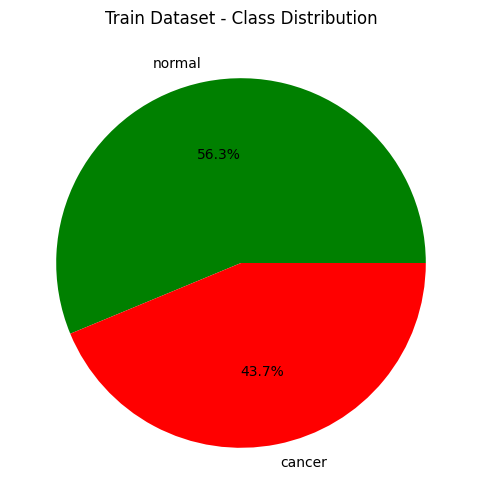

In [ ]:
# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', colors=['green', 'red', 'blue'])
plt.title("Train Dataset - Class Distribution")
plt.show()

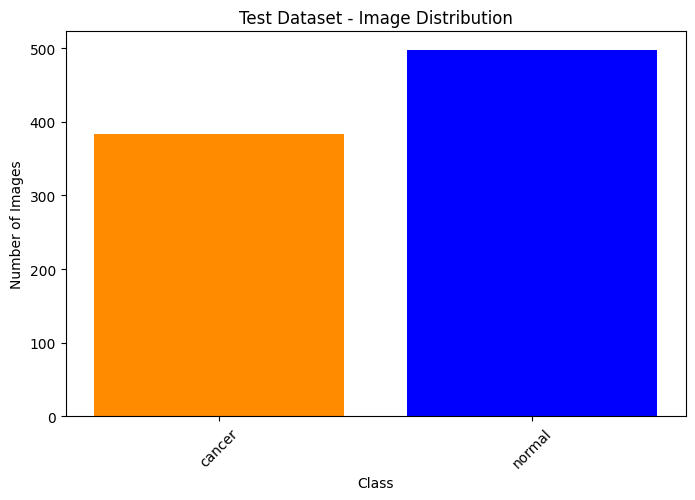

In [ ]:
# Count images in each class (test)
class_counts = {}
for class_name in os.listdir(test_dataset):
    class_path = os.path.join(test_dataset, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Plot bar chart
plt.figure(figsize=(8, 5))
class_counts.values()
plt.bar(class_counts.keys(), class_counts.values(), color=['darkorange','blue'])
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Test Dataset - Image Distribution")
plt.xticks(rotation=45)
plt.show()



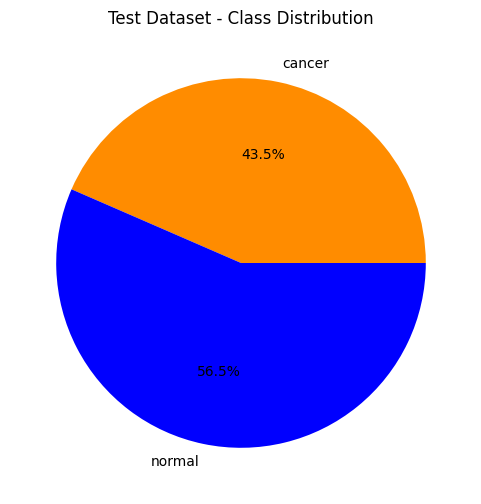

In [ ]:
# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', colors=['darkorange', 'blue'])
plt.title("Test Dataset - Class Distribution")
plt.show()

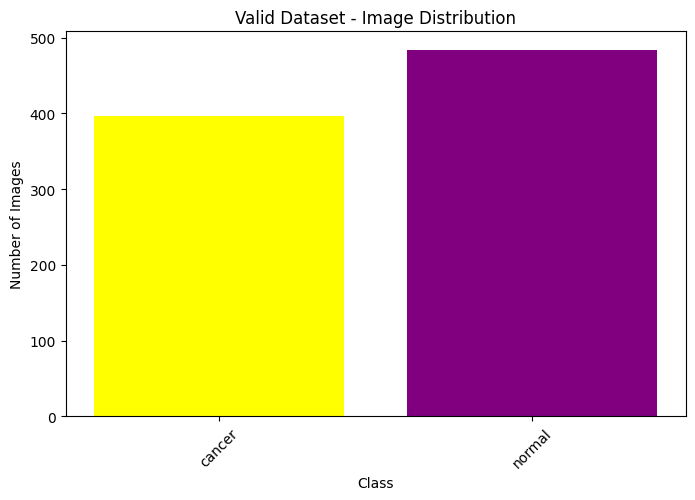

In [ ]:
# Count images in each class (validation)
class_counts = {}
for class_name in os.listdir(valid_dataset):
    class_path = os.path.join(valid_dataset, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(class_counts.keys(), class_counts.values(), color=[ 'yellow', 'purple'])
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Valid Dataset - Image Distribution")
plt.xticks(rotation=45)
plt.show()



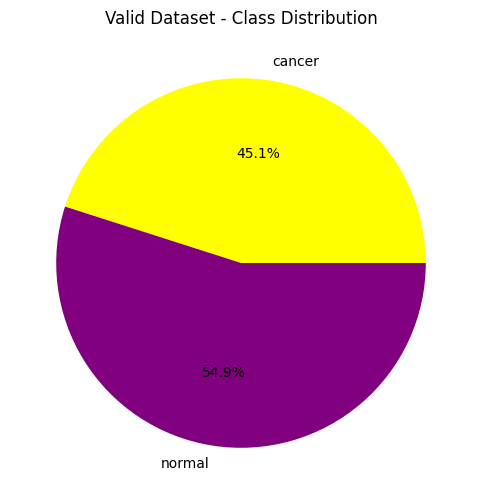

In [ ]:
# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', colors=['yellow', 'purple'])
plt.title("Valid Dataset - Class Distribution")
plt.show()

In [ ]:
import pandas as pd

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
)

In [ ]:
def create_dataframe(dataset_path):
    data = []
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):
            for image_file in os.listdir(class_path):
                data.append([os.path.join(class_name, image_file), class_name])  # [image, label]
    return pd.DataFrame(data, columns=['image', 'label'])

train_df = create_dataframe(train_dataset)
test_df = create_dataframe(test_dataset)
valid_df = create_dataframe(valid_dataset)

In [ ]:
image_size = (224, 224)
batch_size = 32
datagen = ImageDataGenerator(
    rescale=1./255
)
train_generator = datagen.flow_from_dataframe(
    train_df,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    directory=train_dataset
)
test_generator = datagen.flow_from_dataframe(
    test_df,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False,
    directory=test_dataset
)
valid_generator = datagen.flow_from_dataframe(
    valid_df,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    directory=valid_dataset
)

Found 21141 validated image filenames belonging to 2 classes.
Found 881 validated image filenames belonging to 2 classes.
Found 881 validated image filenames belonging to 2 classes.


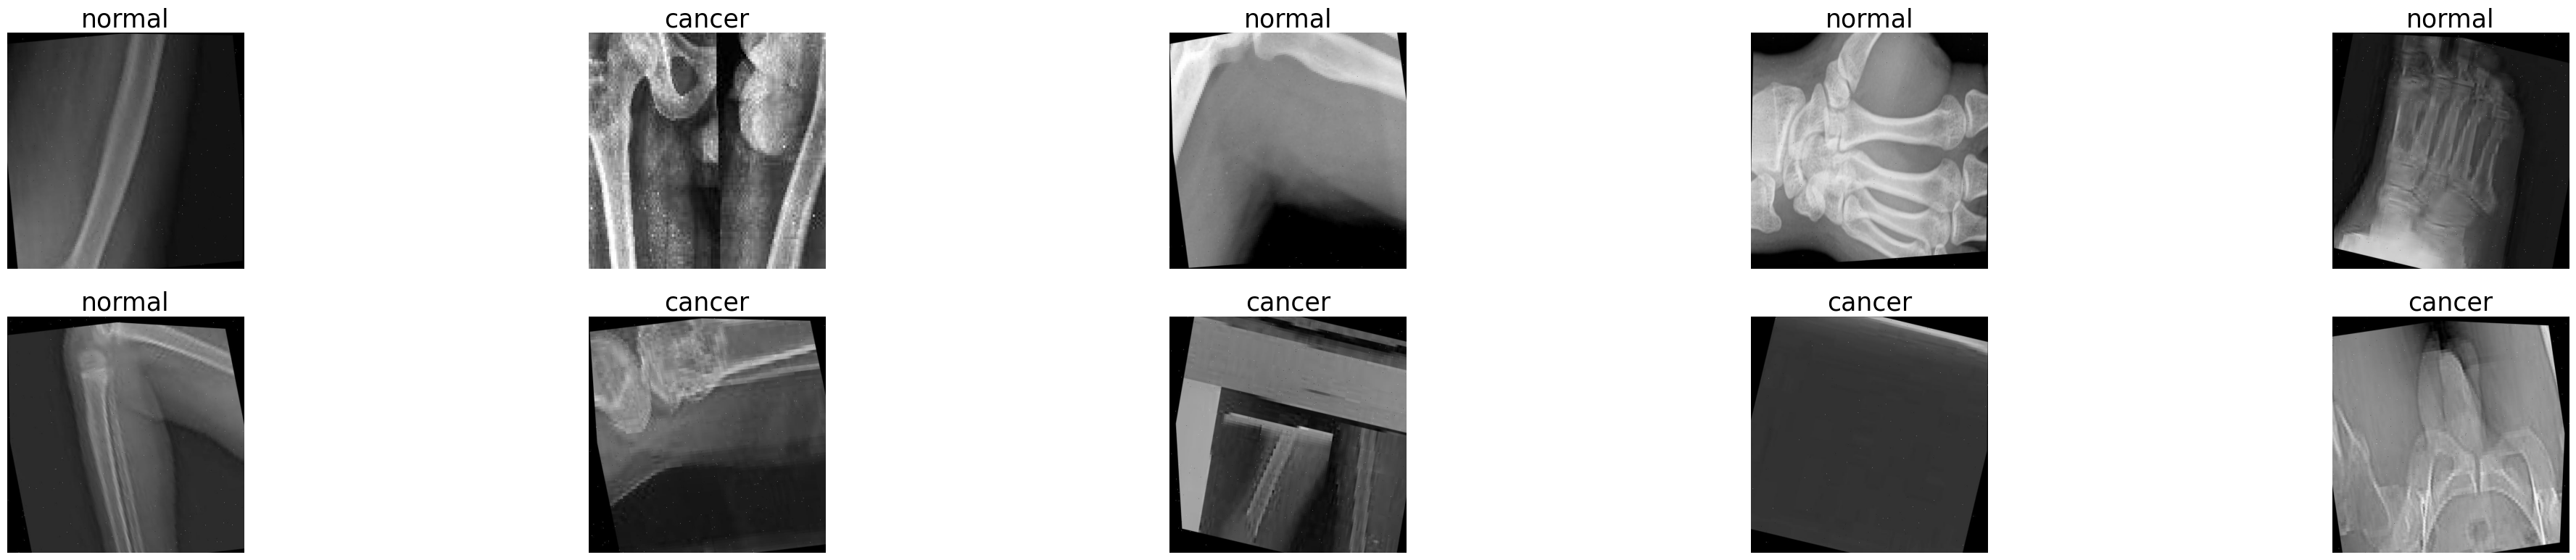

In [ ]:
plt.figure(figsize=(50,50))
for n,i in enumerate(np.random.randint(0,len(train_df),10)):
    plt.subplot(10,5,n+1)
    img=cv2.imread(train_dataset + '/' + train_df.image[i])
    plt.imshow(img)
    plt.axis('off')
    plt.title(train_df.label[i],fontsize=25)

In [ ]:
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam

class_num = 1  # Binary classification

model = models.Sequential()

# First Convolutional Layer
model.add(layers.Conv2D(filters=32, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Second Convolutional Layer
model.add(layers.Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Third Convolutional Layer
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))

# Fourth Convolutional Layer
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))

# Fifth Convolutional Layer
model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Flatten and Fully Connected Layers
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification

# Compile model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 54, 54, 32)          │          11,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 54, 54, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 26, 26, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      52,432,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │           4,097 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 70,830,785 (270.20 MB)

 Trainable params: 70,830,593 (270.20 MB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
from tensorflow.keras.optimizers import Adam # Importing the Adam optimizer
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import metrics
import  tensorflow.keras as keras


In [ ]:
checkpoint_cb =ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb =EarlyStopping(patience=5, restore_best_weights=True)
model.compile(optimizer ='adam', loss='binary_crossentropy', metrics=['accuracy',keras.metrics.SpecificityAtSensitivity(0.5),keras.metrics.AUC()])
hist = model.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator,
    callbacks=[checkpoint_cb, early_stopping_cb]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.7332 - auc: 0.8083 - loss: 3.5811 - specificity_at_sensitivity: 0.9140

661/661 ━━━━━━━━━━━━━━━━━━━━ 5303s 8s/step - accuracy: 0.7333 - auc: 0.8083 - loss: 3.5783 - specificity_at_sensitivity: 0.9141 - val_accuracy: 0.6039 - val_auc: 0.8712 - val_loss: 1.2840 - val_specificity_at_sensitivity: 0.9698
Epoch 2/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.8011 - auc: 0.8937 - loss: 0.5178 - specificity_at_sensitivity: 0.9707

661/661 ━━━━━━━━━━━━━━━━━━━━ 93s 140ms/step - accuracy: 0.8011 - auc: 0.8937 - loss: 0.5177 - specificity_at_sensitivity: 0.9707 - val_accuracy: 0.7923 - val_auc: 0.9089 - val_loss: 0.4790 - val_specificity_at_sensitivity: 0.9647
Epoch 3/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.8118 - auc: 0.9029 - loss: 0.4260 - specificity_at_sensitivity: 0.9748

661/661 ━━━━━━━━━━━━━━━━━━━━ 94s 142ms/step - accuracy: 0.8118 - auc: 0.9029 - loss: 0.4260 - specificity_at_sensitivity: 0.9748 - val_accuracy: 0.8615 - val_auc: 0.9389 - val_loss: 0.3603 - val_specificity_at_sensitivity: 0.9924
Epoch 4/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.8290 - auc: 0.9164 - loss: 0.3844 - specificity_at_sensitivity: 0.9805

661/661 ━━━━━━━━━━━━━━━━━━━━ 94s 143ms/step - accuracy: 0.8289 - auc: 0.9164 - loss: 0.3844 - specificity_at_sensitivity: 0.9805 - val_accuracy: 0.8627 - val_auc: 0.9408 - val_loss: 0.3332 - val_specificity_at_sensitivity: 1.0000
Epoch 5/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.8304 - auc: 0.9205 - loss: 0.3796 - specificity_at_sensitivity: 0.9829

661/661 ━━━━━━━━━━━━━━━━━━━━ 94s 140ms/step - accuracy: 0.8304 - auc: 0.9205 - loss: 0.3796 - specificity_at_sensitivity: 0.9829 - val_accuracy: 0.8604 - val_auc: 0.9536 - val_loss: 0.3042 - val_specificity_at_sensitivity: 1.0000
Epoch 6/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 88s 130ms/step - accuracy: 0.8363 - auc: 0.9246 - loss: 0.3666 - specificity_at_sensitivity: 0.9859 - val_accuracy: 0.8479 - val_auc: 0.9450 - val_loss: 0.3551 - val_specificity_at_sensitivity: 0.9950
Epoch 7/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 91s 137ms/step - accuracy: 0.8400 - auc: 0.9287 - loss: 0.3619 - specificity_at_sensitivity: 0.9834 - val_accuracy: 0.8797 - val_auc: 0.9526 - val_loss: 0.3077 - val_specificity_at_sensitivity: 1.0000
Epoch 8/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.8429 - auc: 0.9290 - loss: 0.3607 - specificity_at_sensitivity: 0.9857

661/661 ━━━━━━━━━━━━━━━━━━━━ 93s 141ms/step - accuracy: 0.8429 - auc: 0.9290 - loss: 0.3607 - specificity_at_sensitivity: 0.9857 - val_accuracy: 0.8820 - val_auc: 0.9560 - val_loss: 0.3021 - val_specificity_at_sensitivity: 0.9899
Epoch 9/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.8524 - auc: 0.9355 - loss: 0.3484 - specificity_at_sensitivity: 0.9852

661/661 ━━━━━━━━━━━━━━━━━━━━ 91s 136ms/step - accuracy: 0.8524 - auc: 0.9355 - loss: 0.3484 - specificity_at_sensitivity: 0.9852 - val_accuracy: 0.8854 - val_auc: 0.9562 - val_loss: 0.2931 - val_specificity_at_sensitivity: 0.9975
Epoch 10/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.8619 - auc: 0.9424 - loss: 0.3278 - specificity_at_sensitivity: 0.9868

661/661 ━━━━━━━━━━━━━━━━━━━━ 95s 141ms/step - accuracy: 0.8619 - auc: 0.9424 - loss: 0.3278 - specificity_at_sensitivity: 0.9868 - val_accuracy: 0.8990 - val_auc: 0.9678 - val_loss: 0.2549 - val_specificity_at_sensitivity: 1.0000


In [ ]:
hist_=pd.DataFrame(hist.history)
hist_

accuracy       auc      loss  specificity_at_sensitivity  val_accuracy  \
0  0.769405  0.855434  1.702865                    0.952211      0.603859   
1  0.805496  0.895139  0.487098                    0.973186      0.792282   
2  0.817558  0.908949  0.410719                    0.977835      0.861521   
3  0.826214  0.915144  0.387326                    0.978809      0.862656   
4  0.827775  0.917522  0.390807                    0.979998      0.860386   
5  0.837141  0.924947  0.368551                    0.982485      0.847900   
6  0.842723  0.928420  0.362134                    0.983241      0.879682   
7  0.843006  0.929906  0.358689                    0.984863      0.881952   
8  0.850527  0.934246  0.357146                    0.984431      0.885358   
9  0.856345  0.940241  0.332039                    0.986593      0.898978   

    val_auc  val_loss  val_specificity_at_sensitivity  
0  0.871245  1.284028                        0.969773  
1  0.908898  0.479016                        0.964736  
2  0.938946  0.360267                        0.992443  
3  0.940829  0.333208                        1.000000  
4  0.953598  0.304169                        1.000000  
5  0.945014  0.355069                        0.994962  
6  0.952586  0.307681                        1.000000  
7  0.956037  0.302145                        0.989924  
8  0.956172  0.293114                        0.997481  
9  0.967816  0.254948                        1.000000

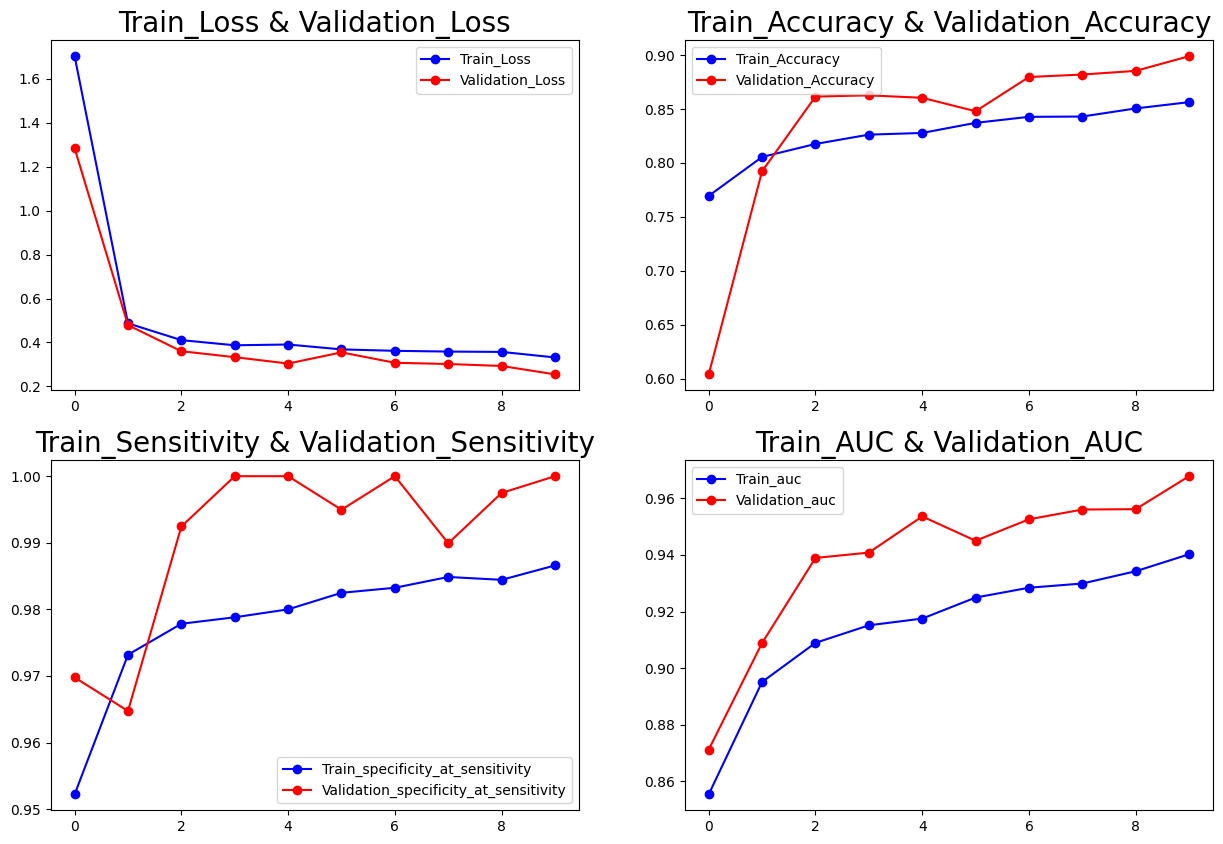

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(hist_['loss'],'b-o',label='Train_Loss')
plt.plot(hist_['val_loss'],'r-o',label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(2,2,2)
plt.plot(hist_['accuracy'],'b-o',label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],'r-o',label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()
plt.subplot(2,2,3)
plt.plot(hist_['specificity_at_sensitivity'],'b-o',label='Train_specificity_at_sensitivity')
plt.plot(hist_['val_specificity_at_sensitivity'],'r-o',label='Validation_specificity_at_sensitivity')
plt.title('Train_Sensitivity & Validation_Sensitivity',fontsize=20)
plt.legend()
plt.subplot(2,2,4)
plt.plot(hist_['auc'],'b-o',label='Train_auc')
plt.plot(hist_['val_auc'],'r-o',label='Validation_auc')
plt.title('Train_AUC & Validation_AUC',fontsize=20)
plt.legend()
plt.show()

In [ ]:

# Get all the metrics (loss, accuracy, specificity_at_sensitivity, auc)
metrics = model.evaluate(test_generator, verbose=0)

# Assign values to variables
loss = metrics[0]
accuracy = metrics[1]
specificity_at_sensitivity = metrics[2]
auc = metrics[3]

# Print the metrics
print('Test Loss =', loss)
print('Test Accuracy =', accuracy)
print('Test Specificity at Sensitivity =', specificity_at_sensitivity)
print('Test AUC =', auc)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Test Loss = 0.2827472686767578
Test Accuracy = 0.8944381475448608
Test Specificity at Sensitivity = 0.9843342304229736
Test AUC = 0.9579650163650513


In [ ]:
y_test =test_generator.classes
predictions = model.predict(test_generator)
y_pred = np.where(predictions >= 0.5, 1, 0)
y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)
df = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})
df

28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step


Actual  Prediction
0         0           0
1         0           0
2         0           0
3         0           0
4         0           0
..      ...         ...
876       1           1
877       1           1
878       1           1
879       1           1
880       1           0

[881 rows x 2 columns]

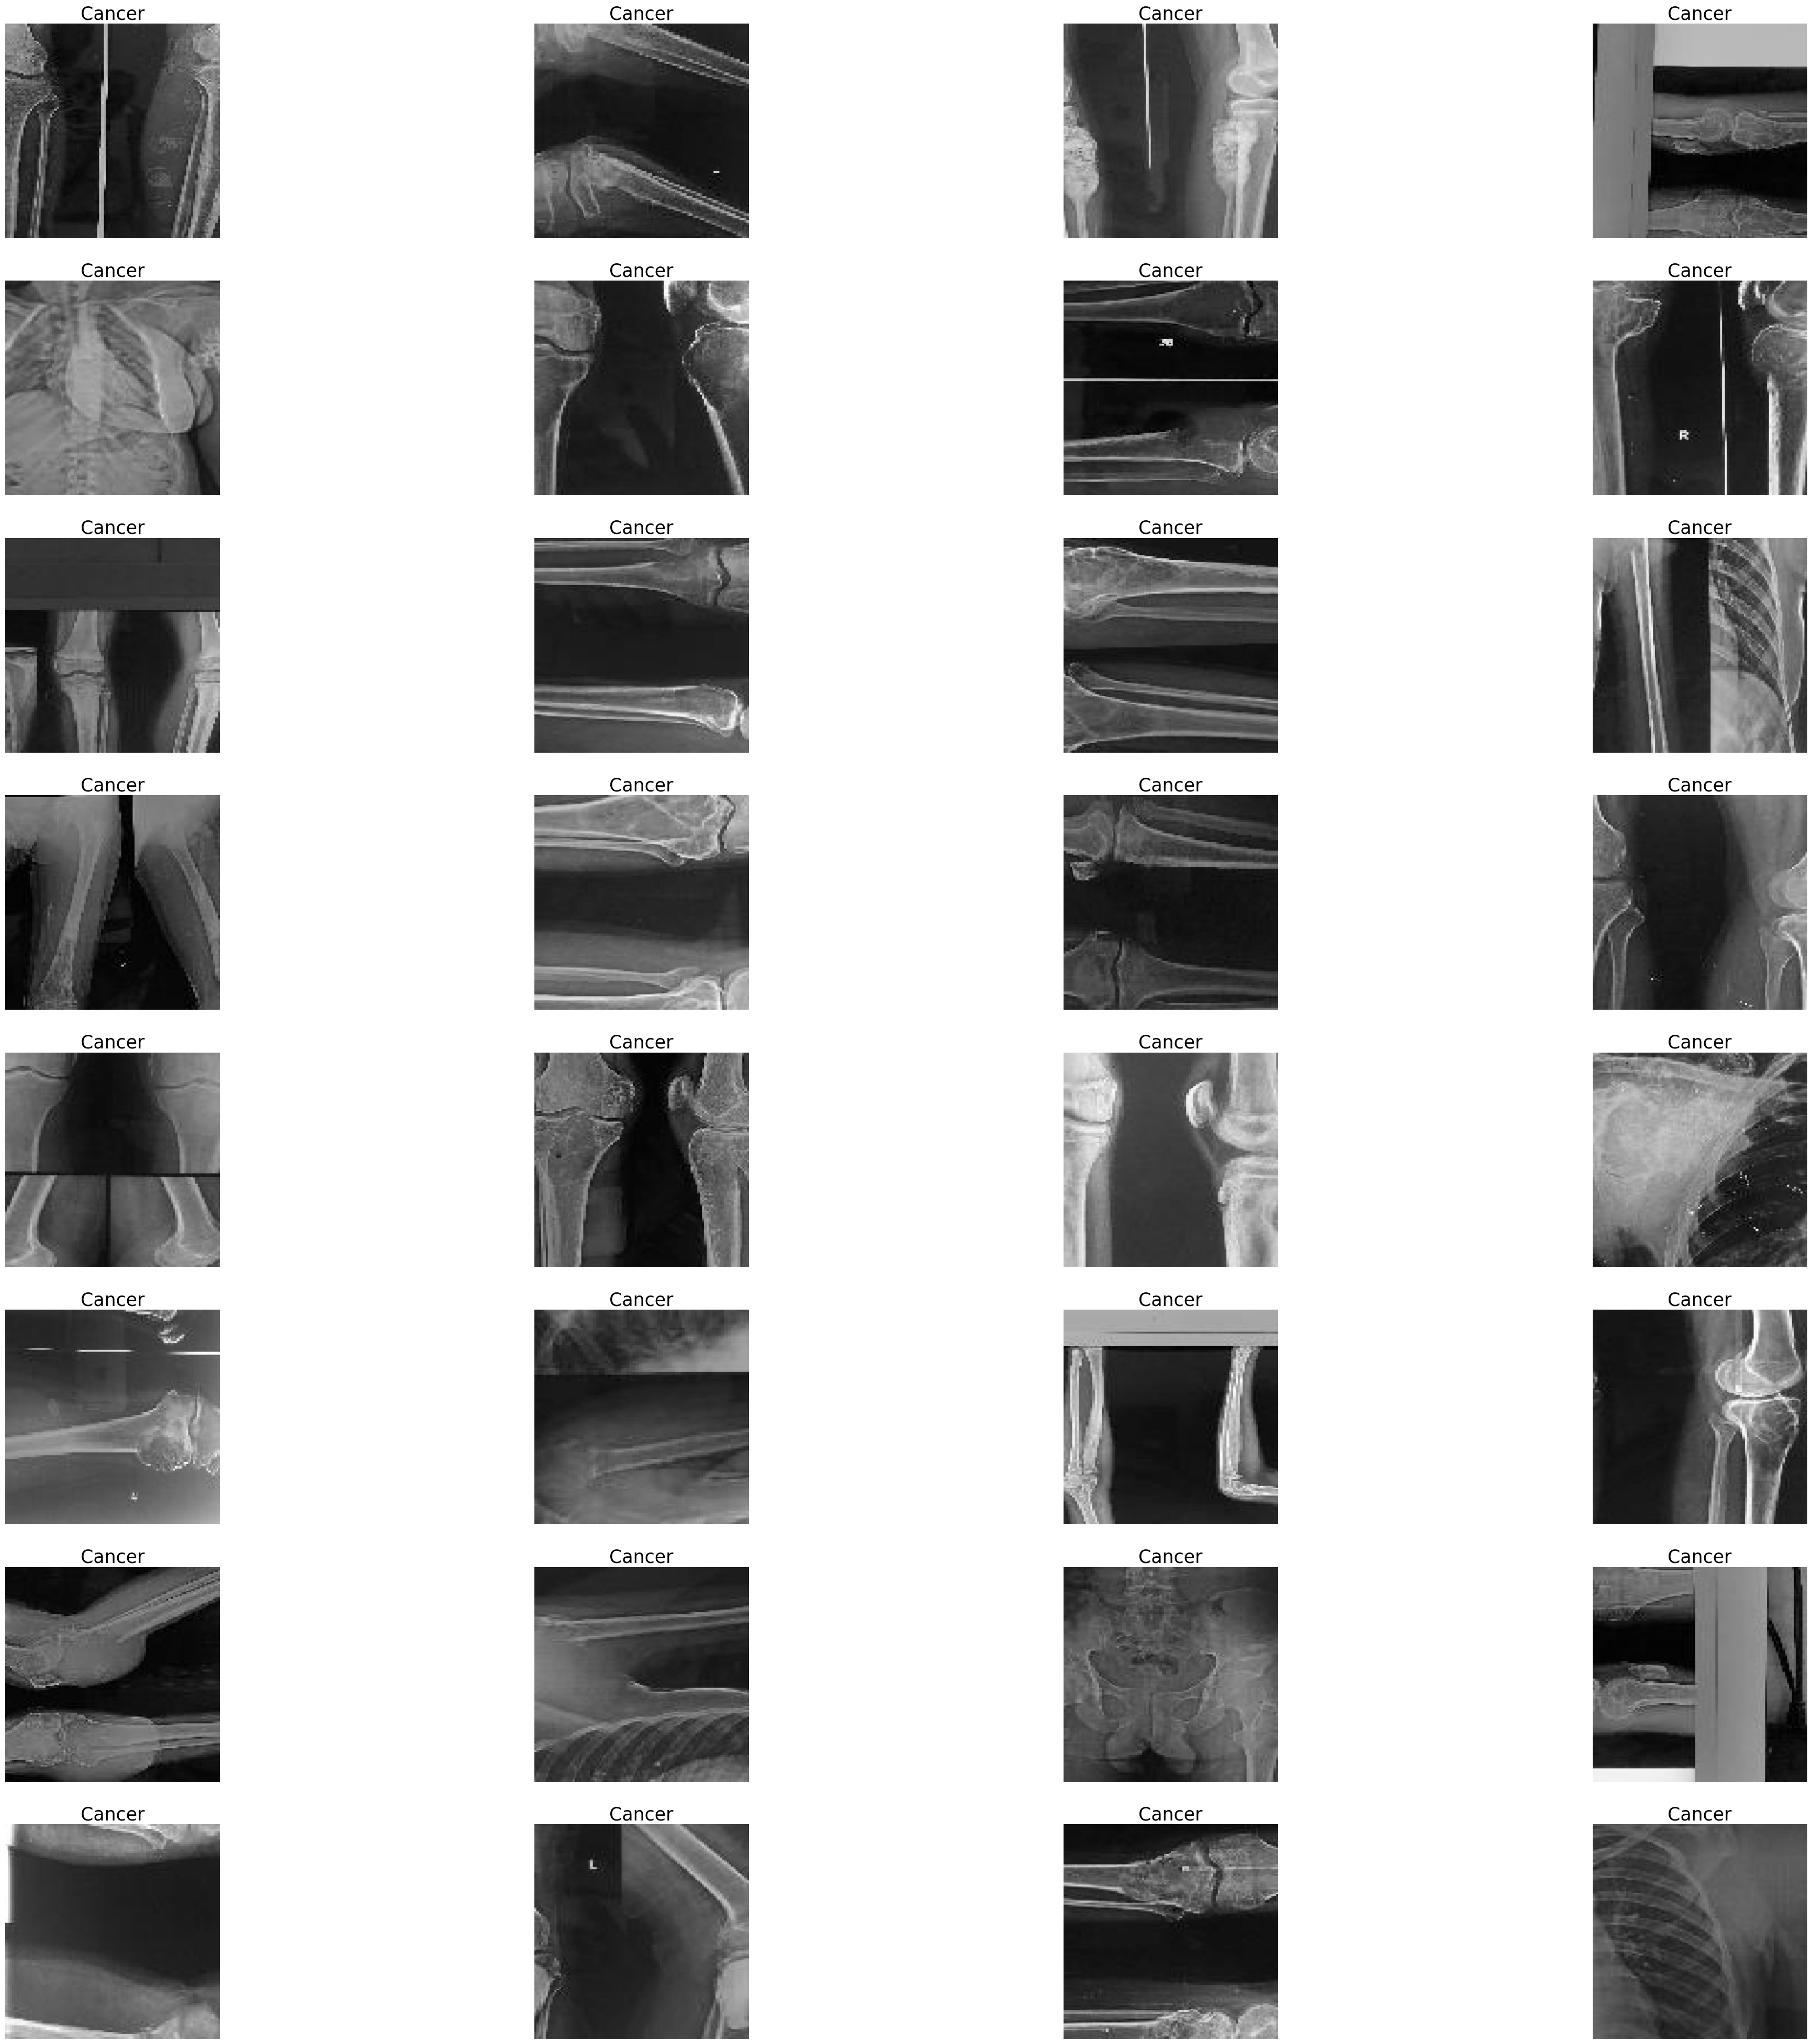

In [ ]:
class_names=['Cancer', 'Normal']
batch = next(test_generator)
images= batch[0]
plt.figure(figsize=(50,50))
for n in range(32):
    plt.subplot(8,4,n+1)
    plt.imshow(images[n])
    plt.axis('off')
    plt.title(class_names[int(y_test[n])],fontsize=25)

In [ ]:
# Import the necessary library and function
from sklearn.metrics import classification_report


In [ ]:
# Classification Report
ClassificationReport = classification_report(y_test, y_pred, target_names=['Cancer','Normal'])
print('Classification Report:\n', ClassificationReport)

Classification Report:
               precision    recall  f1-score   support

      Cancer       0.86      0.90      0.88       383
      Normal       0.92      0.89      0.91       498

    accuracy                           0.89       881
   macro avg       0.89      0.89      0.89       881
weighted avg       0.90      0.89      0.89       881



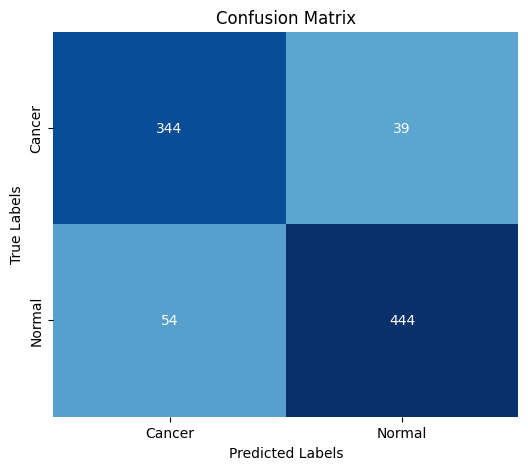

Confusion Matrix:
 [[344  39]
 [ 54 444]]


In [ ]:
from sklearn.metrics import confusion_matrix # import the confusion_matrix function
CM = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(CM, fmt='g', center=True, cbar=False, annot=True, cmap='Blues',
            xticklabels=['Cancer', 'Normal'],
            yticklabels=['Cancer', 'Normal'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print('Confusion Matrix:\n', CM)

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [ ]:
y_test_binarized = label_binarize(y_test, classes=[0, 1])
y_pred_prob = predictions.ravel()
fpr, tpr, _ = roc_curve(y_test_binarized, y_pred_prob)
roc_auc = auc(fpr, tpr)

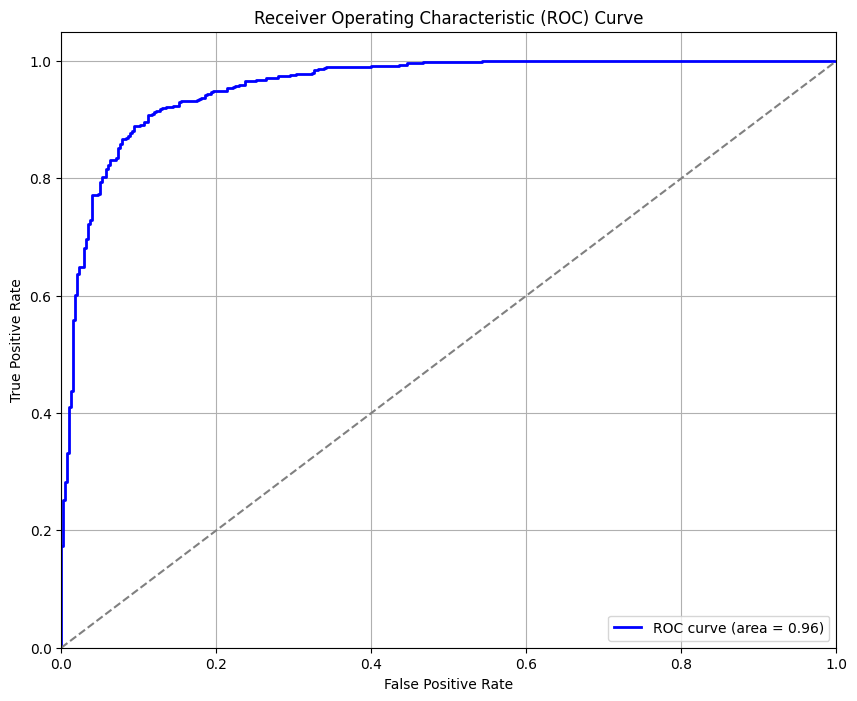

ROC AUC Score: 0.96


In [ ]:
# Import the necessary library and function
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize labels (if not already)
y_test_binarized = label_binarize(y_test, classes=[0, 1])
y_pred_prob = predictions.ravel()

#Calculate fpr, tpr, and roc_auc
fpr, tpr, _ = roc_curve(y_test_binarized, y_pred_prob)
roc_auc = auc(fpr, tpr)

#Plot the ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
print(f'ROC AUC Score: {roc_auc:.2f}')